<a href="https://colab.research.google.com/github/GitP001/Supermarket-Sales-EDA/blob/main/EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
# Used for working with datasets - analyzing, cleaning, manipulating data
import numpy as np
# Used for working with arrays, linear algebra, and matrices
import matplotlib.pyplot as plt
import seaborn as sns
# Python library for creating statistical visualization
# Based on Matplotlib, offers a high-level interface
%matplotlib inline
# Makes plot outputs appear and be stored within the notebook,
# shows up in the same window

In [9]:
df = pd.read_csv('supermarket_sales.csv')

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
df.shape
# returns a tuple representing the dimensionality of DataFrame, (row, column)

(1000, 17)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [13]:
df.columns
# Shows column names

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [14]:
df.dtypes
# Shows each data types of columns

,0
Invoice ID,object
Branch,object
City,object
Customer type,object
Gender,object
Product line,object
Unit price,float64
Quantity,int64
Tax 5%,float64
Total,float64


## **Advantage of Converting dtype into datetime Format**

Converting the dtype of an object column to datetime format has several advantages in data analysis:

1. **Efficient Time-Based Operations**: It enables efficient operations such as date-based filtering, resampling, and aggregation (e.g., monthly or weekly sales).

2. **Accurate Comparisons**: Direct comparison of dates becomes possible, preventing errors that can arise from string comparisons.

3. **Extracting Components**: You can easily extract components like year, month, day, hour, etc., using datetime properties.

4. **Handling Missing and Invalid Dates**: Converting to datetime can help identify and handle invalid or missing dates systematically.

Overall, it simplifies and enhances time-series analysis and manipulation.

In [15]:
df['Date'] = pd.to_datetime(df['Date'])
# Converts dtype of 'Date' into datetime type
# Datetime type allows to perform operations specific dates and times

df['Date']

,Date
0,2019-01-05
1,2019-03-08
2,2019-03-03
3,2019-01-27
4,2019-02-08
...,...
995,2019-01-29
996,2019-03-02
997,2019-02-09
998,2019-02-22


In [16]:
df.dtypes
# dtype of date converted into datetime from object

,0
Invoice ID,object
Branch,object
City,object
Customer type,object
Gender,object
Product line,object
Unit price,float64
Quantity,int64
Tax 5%,float64
Total,float64


In [17]:
df.set_index('Date', inplace = True)
# Set 'Date' as index, and modify the original DataFrame into new one.
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## **Statistical Summary: .describe() method**

The .describe() method in data analysis provides a summary of the statistical properties of a DataFrame's numerical columns. It includes metrics such as:

- **Count**: Number of non-null values.
- **Mean**: Average of the values.
- **Standard Deviation (std)**: Measures the spread of the values.
- **Min, 25%, 50%, 75%, Max**: Minimum, quartiles (25th, 50th, 75th percentile), and maximum values.

This helps in understanding the central tendency, dispersion, and shape of the dataset's distribution. For non-numerical columns, .describe() provides information like count, unique values, top value, and frequency.


In [18]:
df.describe()
# Statistical Summary

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [19]:
df.isnull().sum()
# Shows the number of missing values (NaN) in each column

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


## **Determining which values to replace NaN values**


#### **When to Use the Mean**:

- Suitable for continuous numerical data.
- The data is symmetrically distributed or has no extreme outliers.
- Example: Replacing missing values in 'Unit Price'.


#### **When to Use the Mode**:
- Suitable for categorical or discrete numerical data.
- When a particular value is highly frequent and represents a typical case.
- Example: Replacing missing values in 'Payment Method' or 'Quantity'.

#### **When to Use Other Values**:
- **Median**: for skewed numerical data (not symmetrically distributed - normal distribution) to avoid distortion.


In [20]:
avg_unit_price = df['Unit price'].astype('float').mean()
# Converts the 'Unit price' column to float type
# Calculates the mean (average) of the 'Unit price' column and stores it in the
# variable avg_unit_price.
print(avg_unit_price)

df['Unit price'].replace(np.nan, avg_unit_price, inplace = True)
# Replaces any missing (NaN) values in the 'Unit price' column with the average
# value calculated in the previous step, and modifies the DataFrame directly
# without creating a copy.

55.67213


Replacing missing values with the average (mean) is a common data imputation strategy. It is particularly useful when:

1. **Central Tendency**: The mean represents the central tendency of the data, making it a good estimate for missing values in a normally distributed dataset.

2. **Minimizes Bias**: It avoids skewing the dataset too much, especially when the data points are evenly distributed around the mean.

However, it may not be suitable if the data is highly skewed or if missing values are not random. Other methods, such as median or mode, might be more appropriate in such cases.

In [21]:
from scipy import stats
# Imports the stats module from the scipy library, which provides statistical
# functions.

mode= stats.mode(df['Quantity'])
# Calculates the mode (the most frequently occurring value) of 'Quantity' column
# in df and stores the result in the variable 'mode'.

print(mode)
# Shows the value of mode, and how many times that value occurs in df.

ModeResult(mode=10, count=119)


In [22]:
df['Quantity'].replace(np.nan, "mode", inplace = True)
# Replacing NaN values with mode of a column

Replacing NaN values with the mode of a column is a common data imputation strategy in data analysis. The advantages are:

1. **Prevents Data Loss**: Retains all rows by filling missing values, avoiding the need to drop rows which could lead to loss of information.

2. **Maintains Distribution**: Mode imputation preserves the most common value, keeping the overall distribution closer to the original data.


However, its validity depends on the context. It is suitable when the mode is a reasonable estimate for missing data. In some cases, using the mean, median, or other techniques may be more appropriate.

In [23]:
df.dropna(inplace=True)
# Removes all rows from df that contain any NaN values.

In [24]:
df.isnull().sum()
# Final check on missing values after data cleaning

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


## **Correlations within DataFrame**

In [25]:
df_num = df.select_dtypes(include=[np.number])
# Remove Non-Numerical Columns
df_num = df_num.loc[:, df.nunique() > 1]
# .nunique() returns the count of unique values in the series
# .loc[:, ...] selects all rows ( : ) but only columns where the condition
# (df.nununique() > 1) is True
df_num.corr()
# Calculate the pairwise correlation coefficients between numerical columns
# in a DataFrame.

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,-0.036442,1.000000


#### **Correlation Coefficient**

The correlation coefficient measures the strength and direction of the linear relationship between variables, ranging from -1 to 1:
- **1**: Perfect positive correlation.
- **0**: No correlation.
- **-1**: Perfect negative correlation.

In general, correlation coefficients are interpreted as follows:

- **0.0 to 0.1 (or -0.1)**: No or very weak correlation.
- **0.1 to 0.3 (or -0.1 to -0.3)**: Weak correlation.
- **0.3 to 0.5 (or -0.3 to -0.5)**: Moderate correlation.
- **0.5 to 0.7 (or -0.5 to -0.7)**: Strong correlation.
- **0.7 to 1.0 (or -0.7 to -1.0)**: Very strong correlation.

In [26]:
np.round(df_num.corr(),2)
# Use numpy fn round() and round the values in the correlation matrix into
# 2 decimal places.

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
Unit price,1.00,0.01,0.63,0.63,0.63,0.63,-0.01
Quantity,0.01,1.00,0.71,0.71,0.71,0.71,-0.02
Tax 5%,0.63,0.71,1.00,1.00,1.00,1.00,-0.04
Total,0.63,0.71,1.00,1.00,1.00,1.00,-0.04
cogs,0.63,0.71,1.00,1.00,1.00,1.00,-0.04
gross income,0.63,0.71,1.00,1.00,1.00,1.00,-0.04
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,-0.04,1.00


## **EXPLORATORY DATA ANALYSIS**

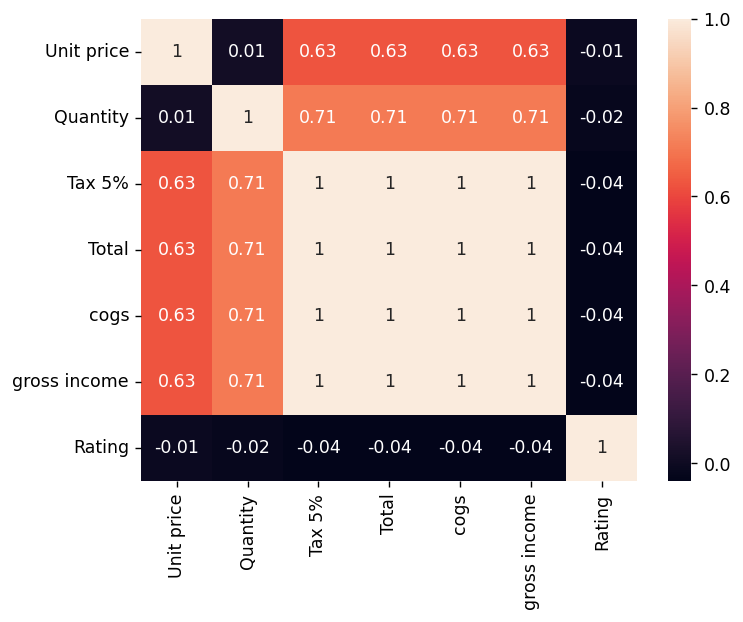

In [27]:
plt.figure(dpi=125)
# Sets up the figure with a resolution of 125 DPI,
# controlling the quality of the image
sns.heatmap(np.round(df_num.corr(), 2), annot = True)
# df.corr() calculates the correlation matrix of the DataFrame
# np.round(..., 2) rounds the correlation values to 2 decimal places
# sns.heatmap(...) creates a heatmap to visualize the correlation matrix
# annot=True displays the correlation values on the heatmap cells.
plt.show()

## **Analysis of Correlation Matrix**

- Correlation of 1: Tax 5%, Total, Gross Income and cogs(Cost of Goods Sold)

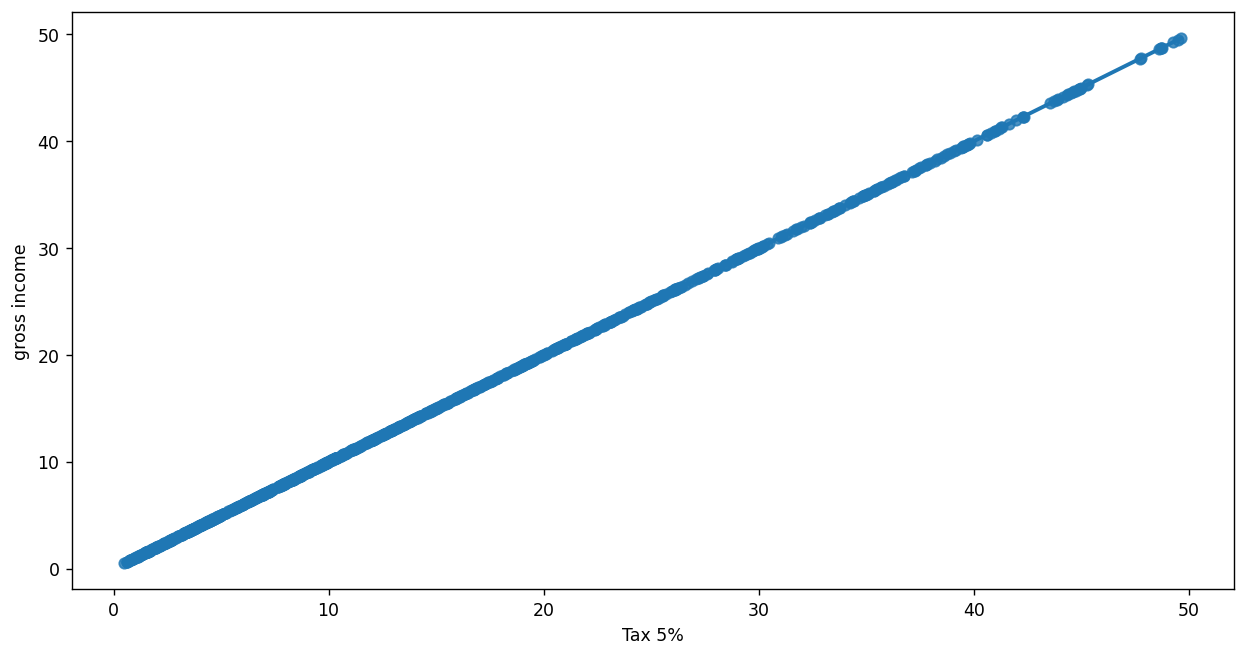

In [28]:
plt.figure(figsize = (12,6), dpi = 125)
sns.regplot(x='Tax 5%', y='gross income', data=df_num)
# Creates a scatter plot
plt.xlabel('Tax 5%')
plt.ylabel('gross income')
plt.show()

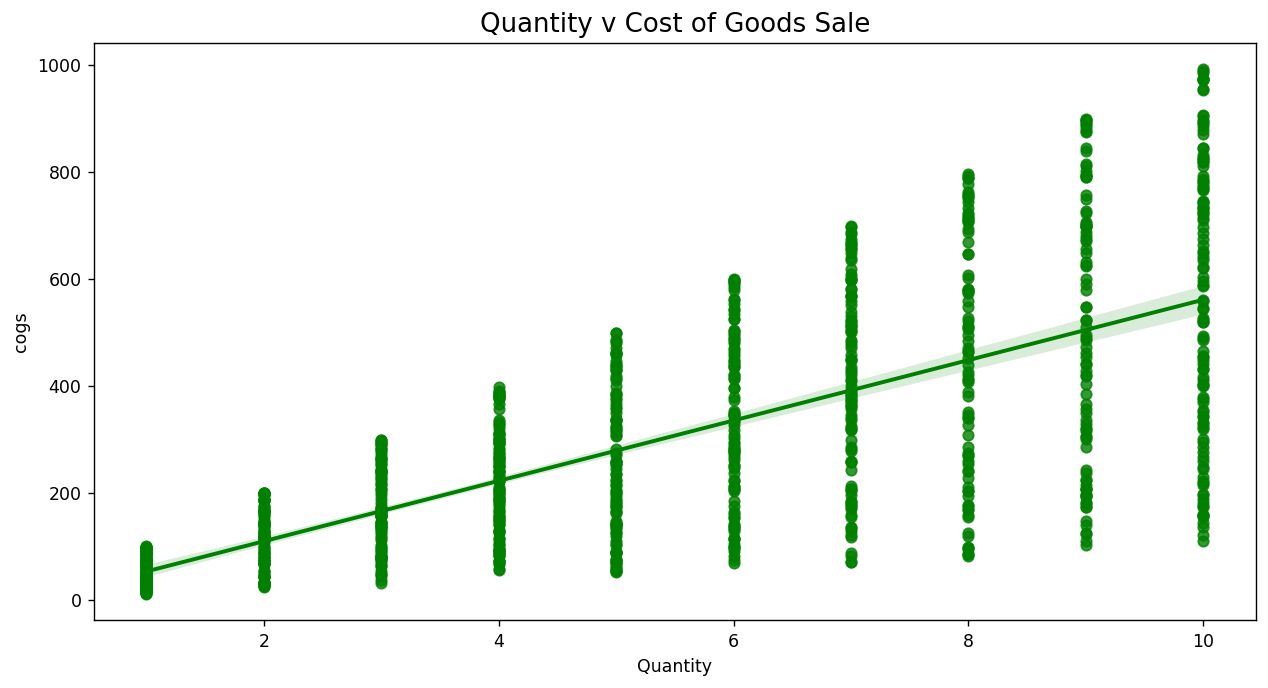

In [29]:
plt.figure(figsize = (12,6), dpi = 125)
sns.regplot(x='Quantity', y='cogs', data=df_num, color = 'Green')
plt.xlabel('Quantity')
plt.ylabel('cogs')
plt.title('Quantity vs Cost of Goods Sale', fontsize=15)
plt.show()

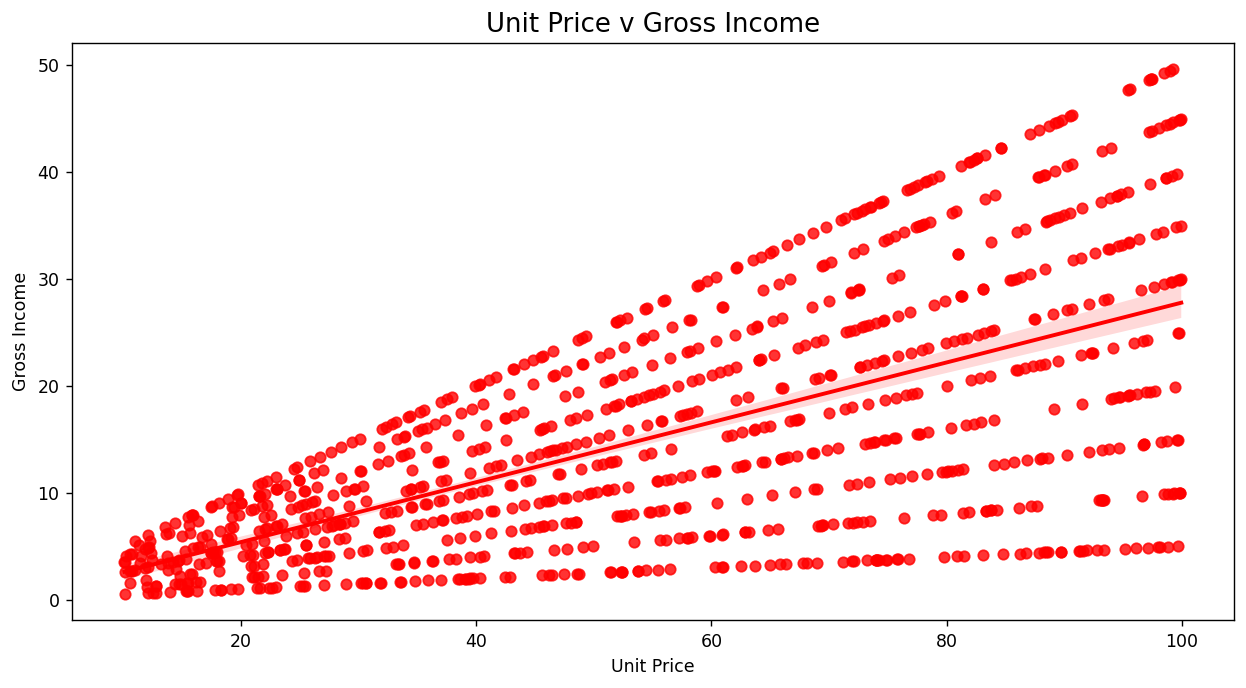

In [30]:
plt.figure(figsize = (12,6), dpi = 125)
sns.regplot(x='Unit price', y='gross income', data=df_num, color = 'Red')
plt.xlabel('Unit Price')
plt.ylabel('Gross Income')
plt.title('Unit Price vs Gross Income', fontsize=15)
plt.show()

## **Anlaysis of Rating Distribution**

### **Finding Mean Rating**

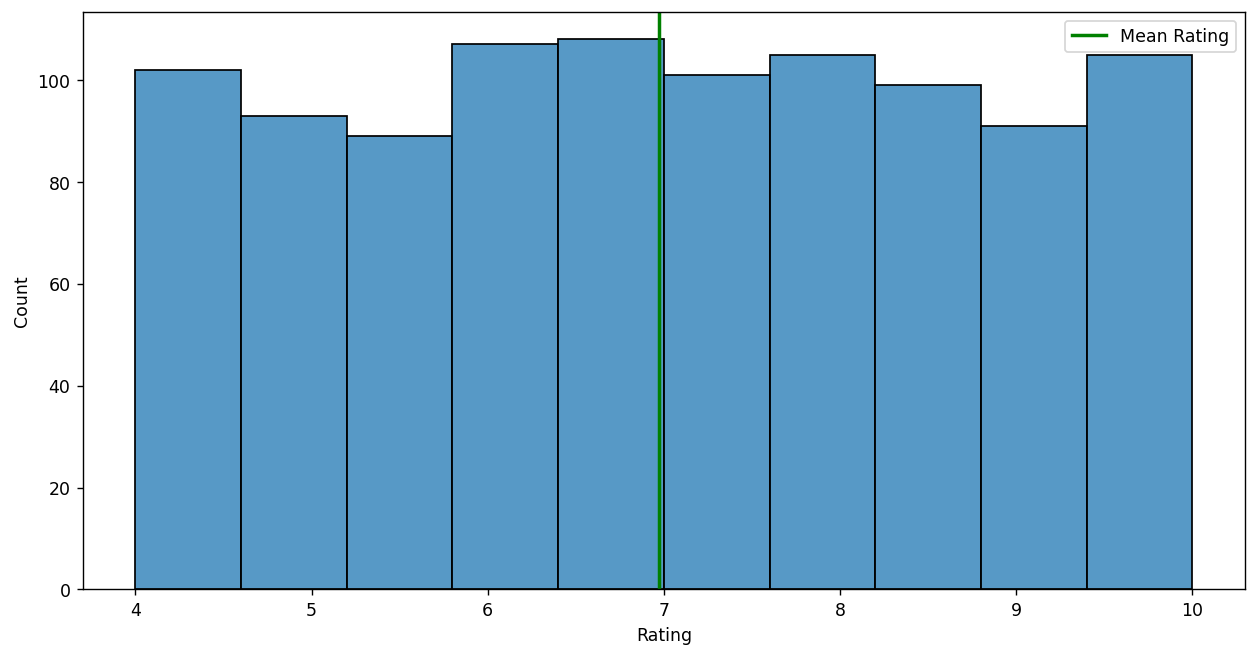

In [31]:
plt.figure(figsize = (12, 6), dpi=125)
sns.histplot(df_num['Rating'], bins = 10)
# .distplot() will be removed in seaborn v0.14.0
# instead we use .histplot() which creates a histogram
# bins parameter specifes the number of divided intervals of the range of data
plt.axvline(x=np.mean(df_num['Rating']), c='green',
            label = 'Mean Rating', linewidth=2)
plt.legend()
# Displays a legend on the plot
plt.show()

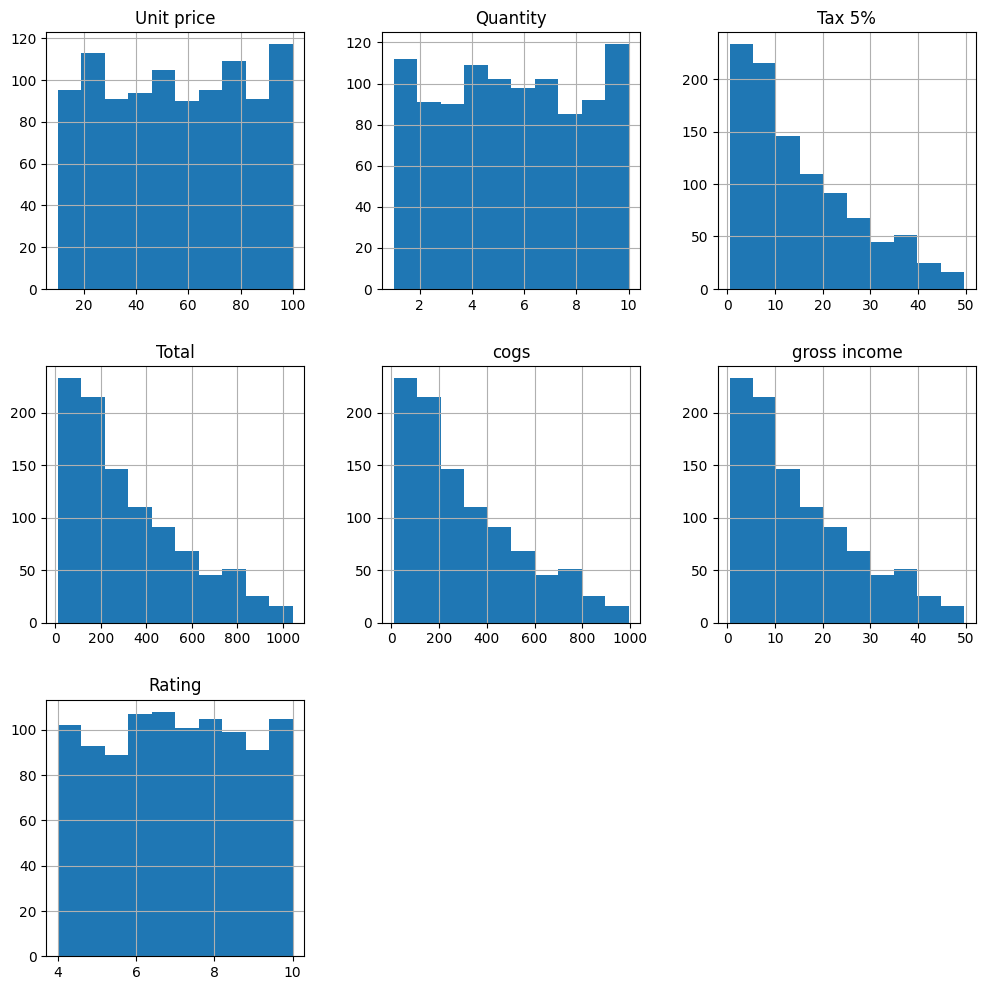

In [32]:
# Plotting all Histograms
df_num.hist(figsize=(12, 12))
plt.show()

## **Difference between `.hist()` and `.histplot()`**

1. `.hist()`:
- A method from Matplotlib
- Basic histogram with limited customization.
- Suitable for simple, quick visualizations.
2. `.histplot()`:
- A method from Seaborn
- More advanced features like additional styling, support for multiple datasets, KDE, and automatic binning.

## **Analysis of Branch, City, and Product Type**

In [33]:
print(df.columns)

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Time',
       'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')


In [76]:
def print_val_cnt(col_name):
  # Get the value counts and index for the specified column
  value_order = df[col_name].value_counts().index
  value_counts = df[col_name].value_counts()
  # Loop through the index to get each value and its corresponding count
  for value in value_order:
    print(f"{value}: {value_counts[value]}")

A: 340
B: 332
C: 328


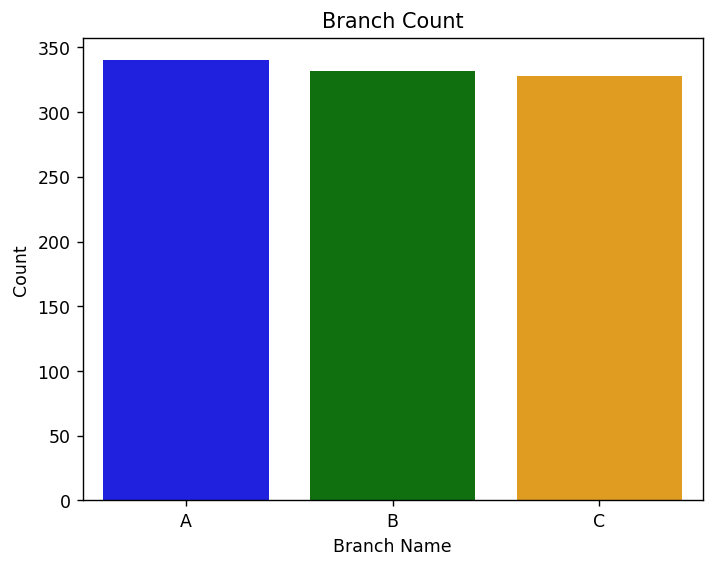

In [124]:
# Sort branches by count
branch_order = df['Branch'].value_counts().index
# .value_counts() counts the occurrences of each unique value in the column,
## returns a pandas series where the index contains the unique values and the
## values are their counts (frequencies)
# .index extracts the index from the result of value_counts(), and returns
## a list of unique branch names, ordered by their counts in descending order

# Define a color palette for first, second, and third place
colors = ['blue', 'orange', 'green']

# Branch Count Bar plot
plt.figure(dpi=125)
sns.countplot(x='Branch', data=df, order=branch_order,
              palette=colors, hue = 'Branch')
# Creates a bar plot showing the count of occurrences for each 'Branch' category
# in the DataFrame df
plt.xlabel('Branch Name')
plt.ylabel('Count')
plt.title('Branch Count')

print_val_cnt('Branch')

# A,B,C = df.Branch.value_counts()
## Calculates the counts for each branch and assigns the values to A, B, and C
# print(f'Branch A: {A}')
# print(f'Branch B: {B}')
# print(f'Branch C: {C}')
plt.show()

## **Difference between Using `sns.countplot(df['Branch'])` and `sns.countplot(x='Branch', data=df)`**

1. `sns.countplot(df['Branch'])`:
- Directly takes a pandas Series (`df['Branch']`) as input.
- Simpler but less flexible in specifying additional parameters like labels.

2. `sns.countplot(x='Branch', data=df)`:
- Specifies the column name `'Branch'` and DataFrame `df`.
- More flexible, allowing additional arguments and aesthetics, such as `hue`, `order`, `palette` for category separation.

The second method is preferred for complex plots due to its flexibility and readability.

Ewallet: 345
Cash: 344
Credit card: 311


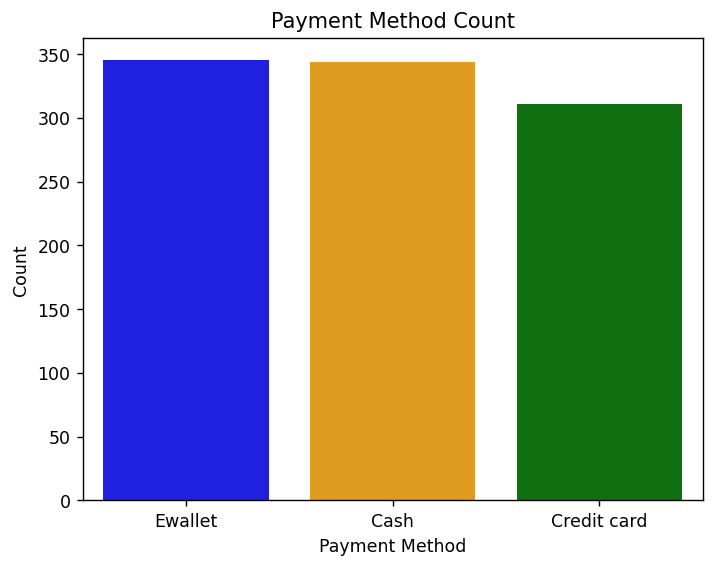

In [122]:
payment_order = df['Payment'].value_counts().index

plt.figure(dpi=125)
sns.countplot(x = 'Payment', data = df, order = payment_order,
              palette = colors, hue = 'Payment')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Payment Method Count')

print_val_cnt('Payment')

# A,B,C =df.Payment.value_counts()

# print(f'E-wallet: {A}')
# print(f'Cash: {B}')
# print(f'Credit Card: {C}')

plt.show()

Yangon: 340
Mandalay: 332
Naypyitaw: 328


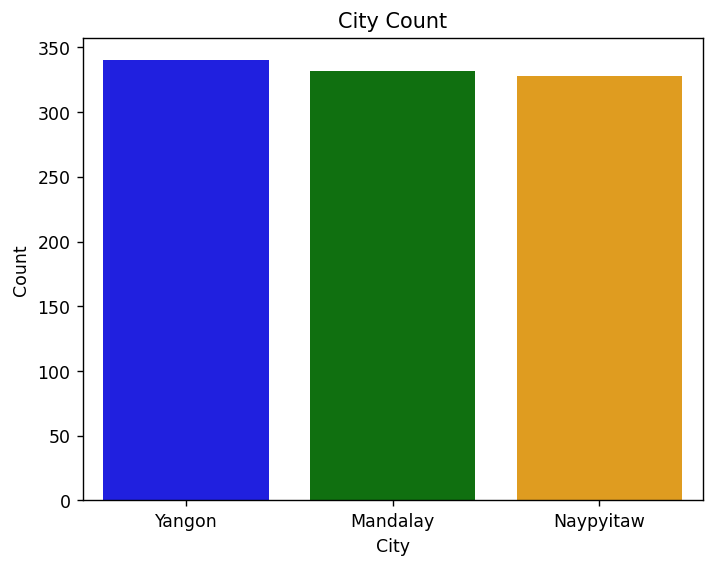

In [120]:
city_order = df['City'].value_counts().index

plt.figure(dpi=125)
sns.countplot(x = 'City', data = df, order = city_order,
              palette = colors, hue = 'City')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('City Count')

print_val_cnt('City')

# A,B,C =df.City.value_counts()

# print(f'Yangon: {A}')
# print(f'Mandalay: {B}')
# print(f'Napyitow: {C}')
plt.show()

Female: 501
Male: 499


<ipython-input-121-07b8fe2f4a8c>:4: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x = 'Gender', data = df, order = gender_count,


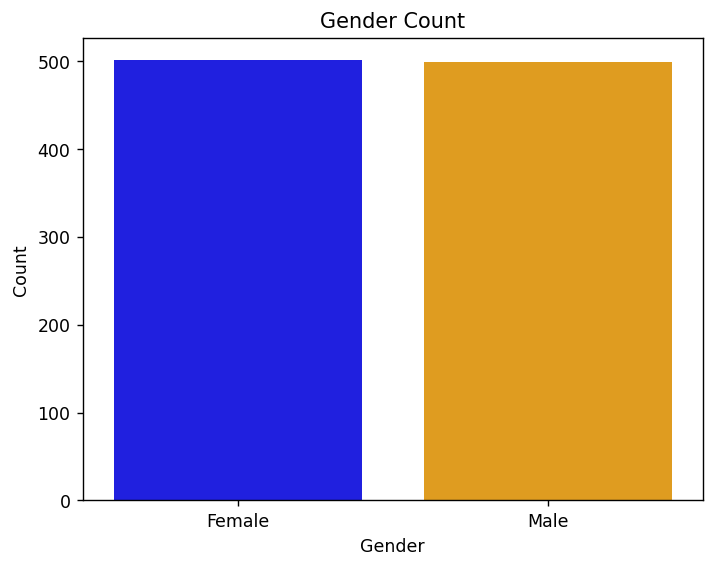

In [121]:
gender_count = df['Gender'].value_counts().index

plt.figure(dpi=125)
sns.countplot(x = 'Gender', data = df, order = gender_count,
              palette = colors, hue = 'Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Count')

print_val_cnt('Gender')

# A,B =df.Gender.value_counts()

# print(f'Female: {A}')
# print(f'Male: {B}')
plt.show()

##**Visualizing a Gender based comparison related to Product Type**


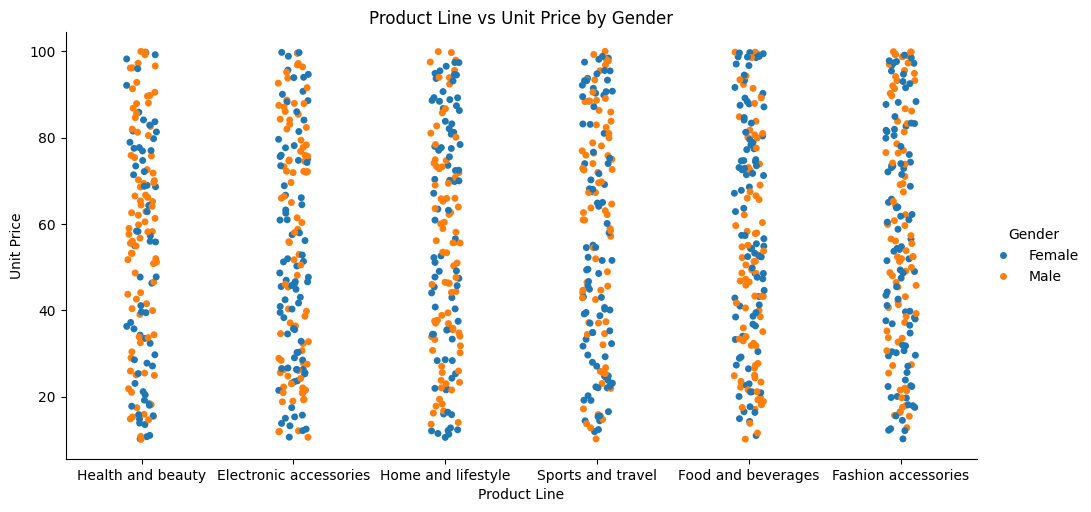

In [110]:
sns.catplot(x='Product line', y='Unit price', hue='Gender',
            data=df, aspect = 2)
# aspect attribute controls the width-to-height ratio of the plot
## aspect < 1: Makes the plot taller
## aspect > 1: Makes the plot wider
plt.xlabel('Product Line')
plt.ylabel('Unit Price')
plt.title('Product Line vs Unit Price by Gender')
plt.show()

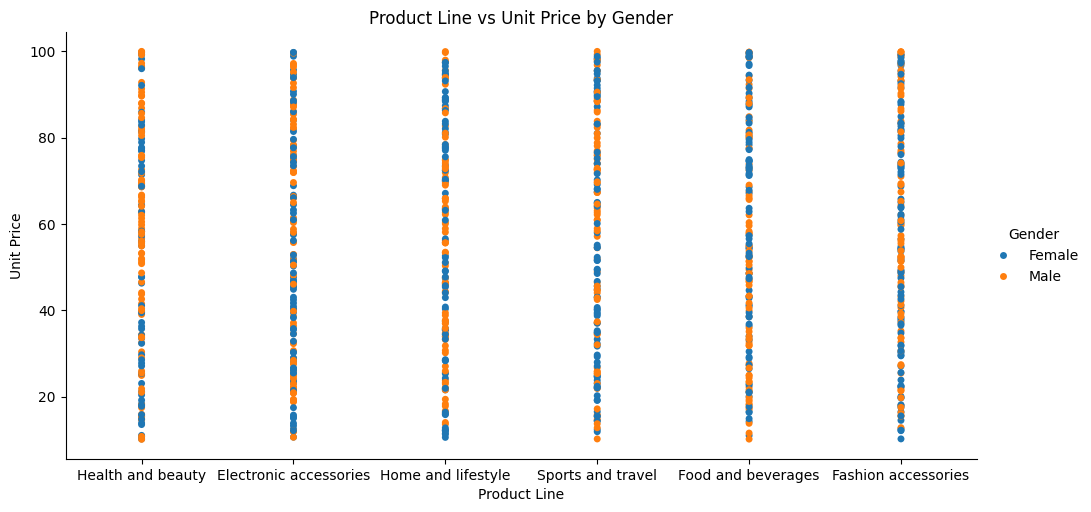

In [109]:
# Scatter plot without jitter
sns.catplot(x='Product line', y='Unit price', hue='Gender',
            data=df, aspect = 2, jitter = False)
plt.xlabel('Product Line')
plt.ylabel('Unit Price')
plt.title('Product Line vs Unit Price by Gender')
plt.show()

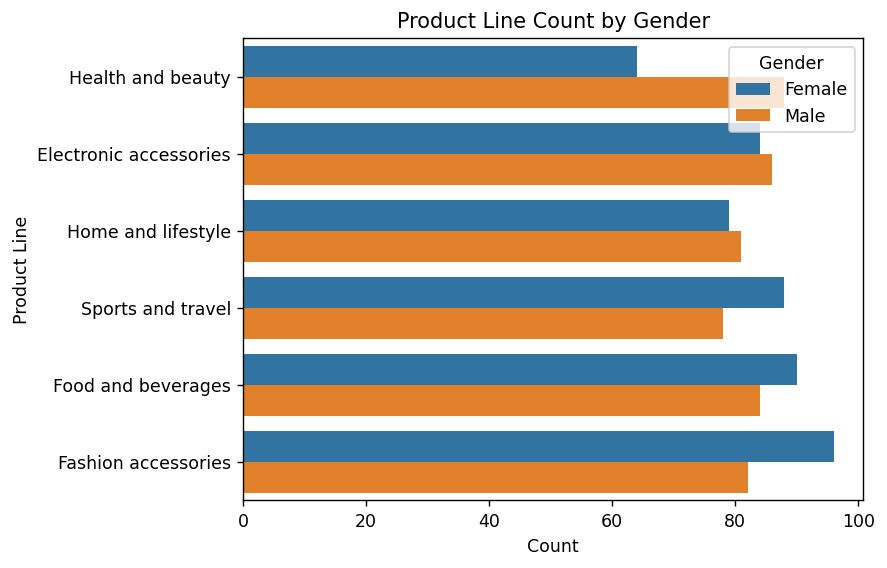

In [97]:
plt.figure(dpi=125)
sns.countplot(y='Product line', hue='Gender', data=df)
plt.xlabel('Count')
plt.ylabel('Product Line')
plt.title('Product Line Count by Gender')
plt.show()

##**Visualizing a City based comparison related to Product Type**

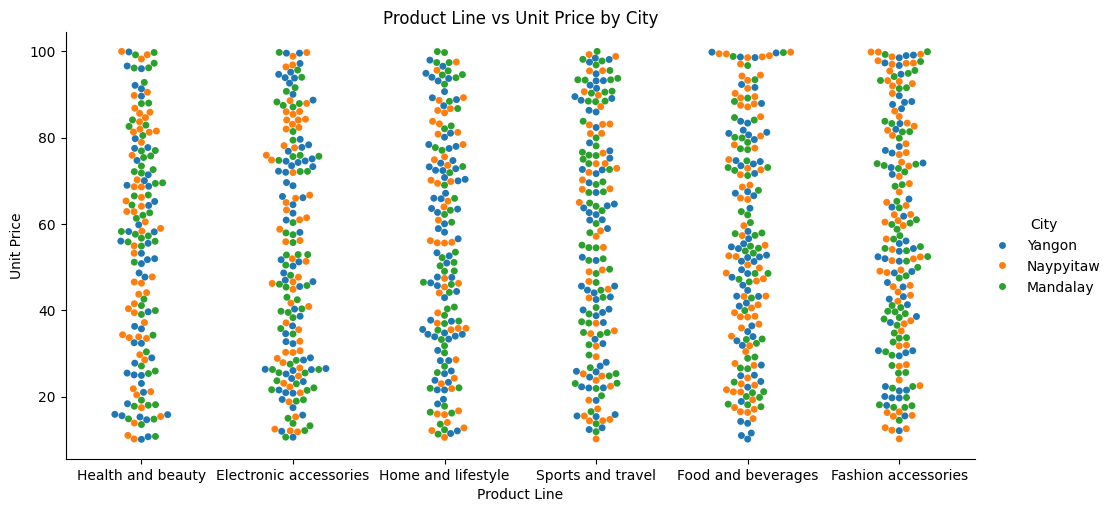

In [98]:
sns.catplot(x='Product line', y='Unit price', hue = 'City',
            kind = 'swarm', data = df, aspect = 2)
plt.xlabel('Product Line')
plt.ylabel('Unit Price')
plt.title('Product Line vs Unit Price by City')
plt.show()

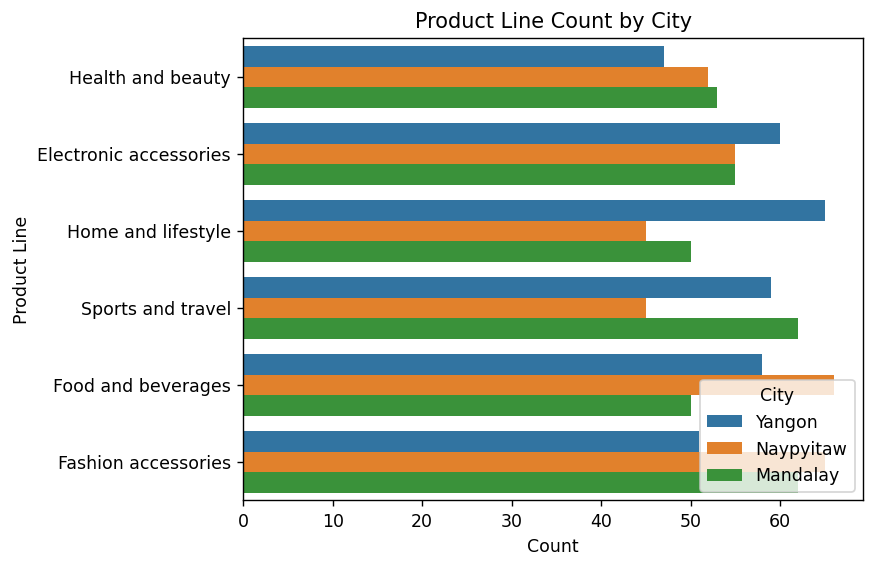

In [99]:
plt.figure(dpi=125)
sns.countplot(y='Product line', hue='City', data=df)
plt.xlabel('Count')
plt.ylabel('Product Line')
plt.title('Product Line Count by City')
plt.show()

##**Finding the most used payment method for Product Type, Branch and City**

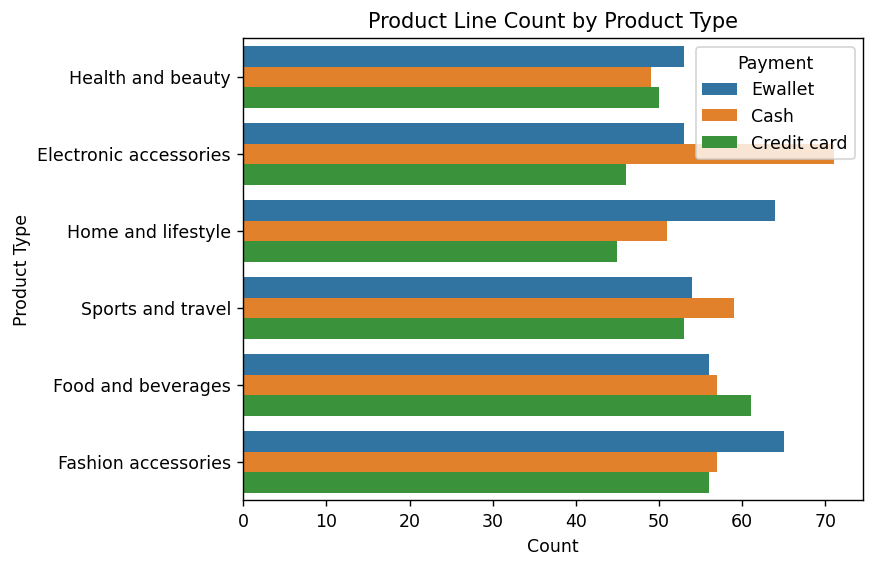

In [101]:
plt.figure(dpi=125)
sns.countplot(y ='Product line', hue = "Payment", data = df)
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.title('Product Line Count by Product Type')
plt.show()

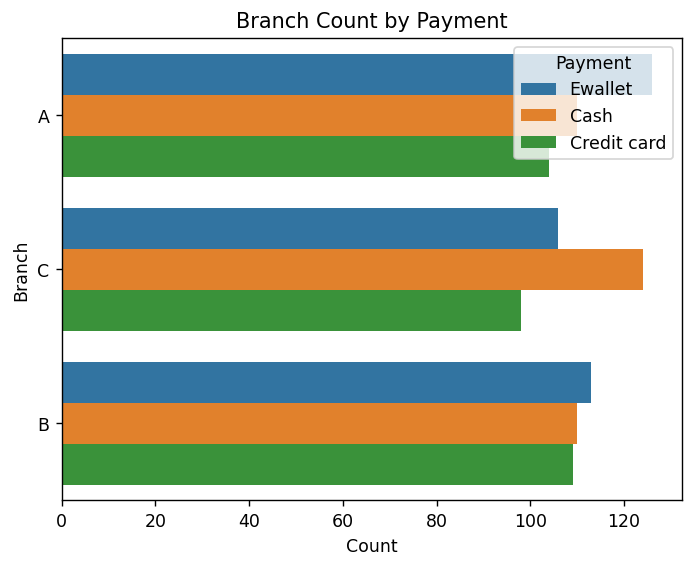

In [105]:
plt.figure(dpi=125)
sns.countplot(y ='Branch', hue = "Payment", data = df)
plt.xlabel('Count')
plt.ylabel('Branch')
plt.title('Branch Count by Payment')
plt.show()

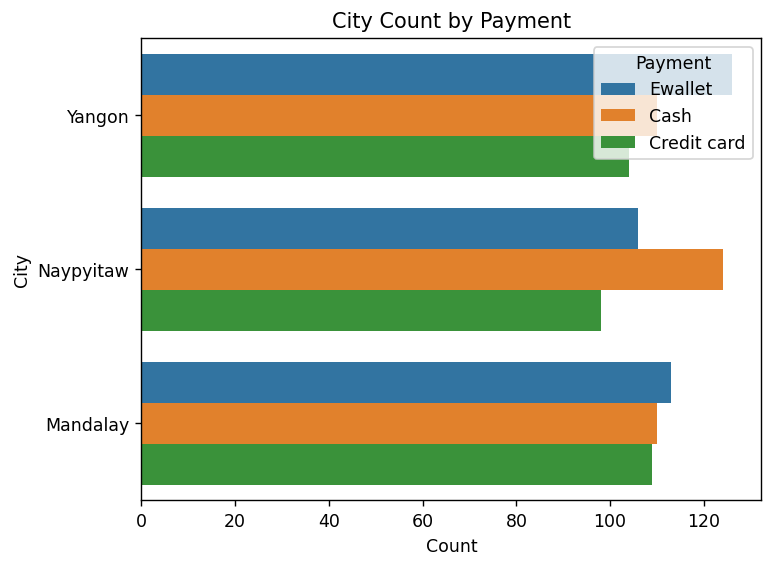

In [106]:
plt.figure(dpi=125)
sns.countplot(y ='City', hue = "Payment", data = df)
plt.xlabel('Count')
plt.ylabel('City')
plt.title('City Count by Payment')
plt.show()

##**Finding Which Branch has better sale for a particular product type**

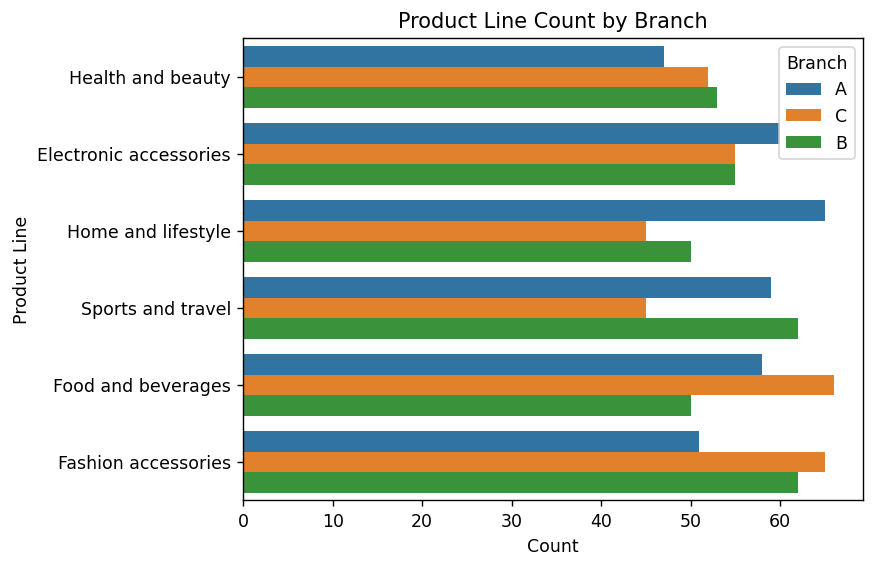

In [108]:
plt.figure(dpi=125)
sns.countplot(y='Product line', hue = 'Branch', data=df)
plt.xlabel('Count')
plt.ylabel('Product Line')
plt.title('Product Line Count by Branch')
plt.show()

##**Difference between Box Plot and Boxen Plot**

- **Box Plot**
  - Shows a summary of data distribution using quartiles (Q1, Q2/median, Q3) and whiskers.
  - Displays outliers as points outside the whiskers.
  - Useful for small to moderately sized datasets.
- **Boxen Plot**
  - Designed to visualize distributions with more detail for large datasets.
  - Displays additional percentiles beyond just the quartiles, providing a more detailed view of the distribution.
  - Useful for large datasets where finer details are needed.


##**Whiskers**

  **Whiskers** refer to the lines that extended from the top and bottom of the box. Typically covers 1.5 times the interquartile range(IQR) from the lower and upper quartiles (Q1 and Q3).
  
  The whiskers show the spread of the bulk of the data, and any points outside the whiskers are considered **outliers**. Whiskers give a visual indication of the variability outside the middle 50% of the data.
  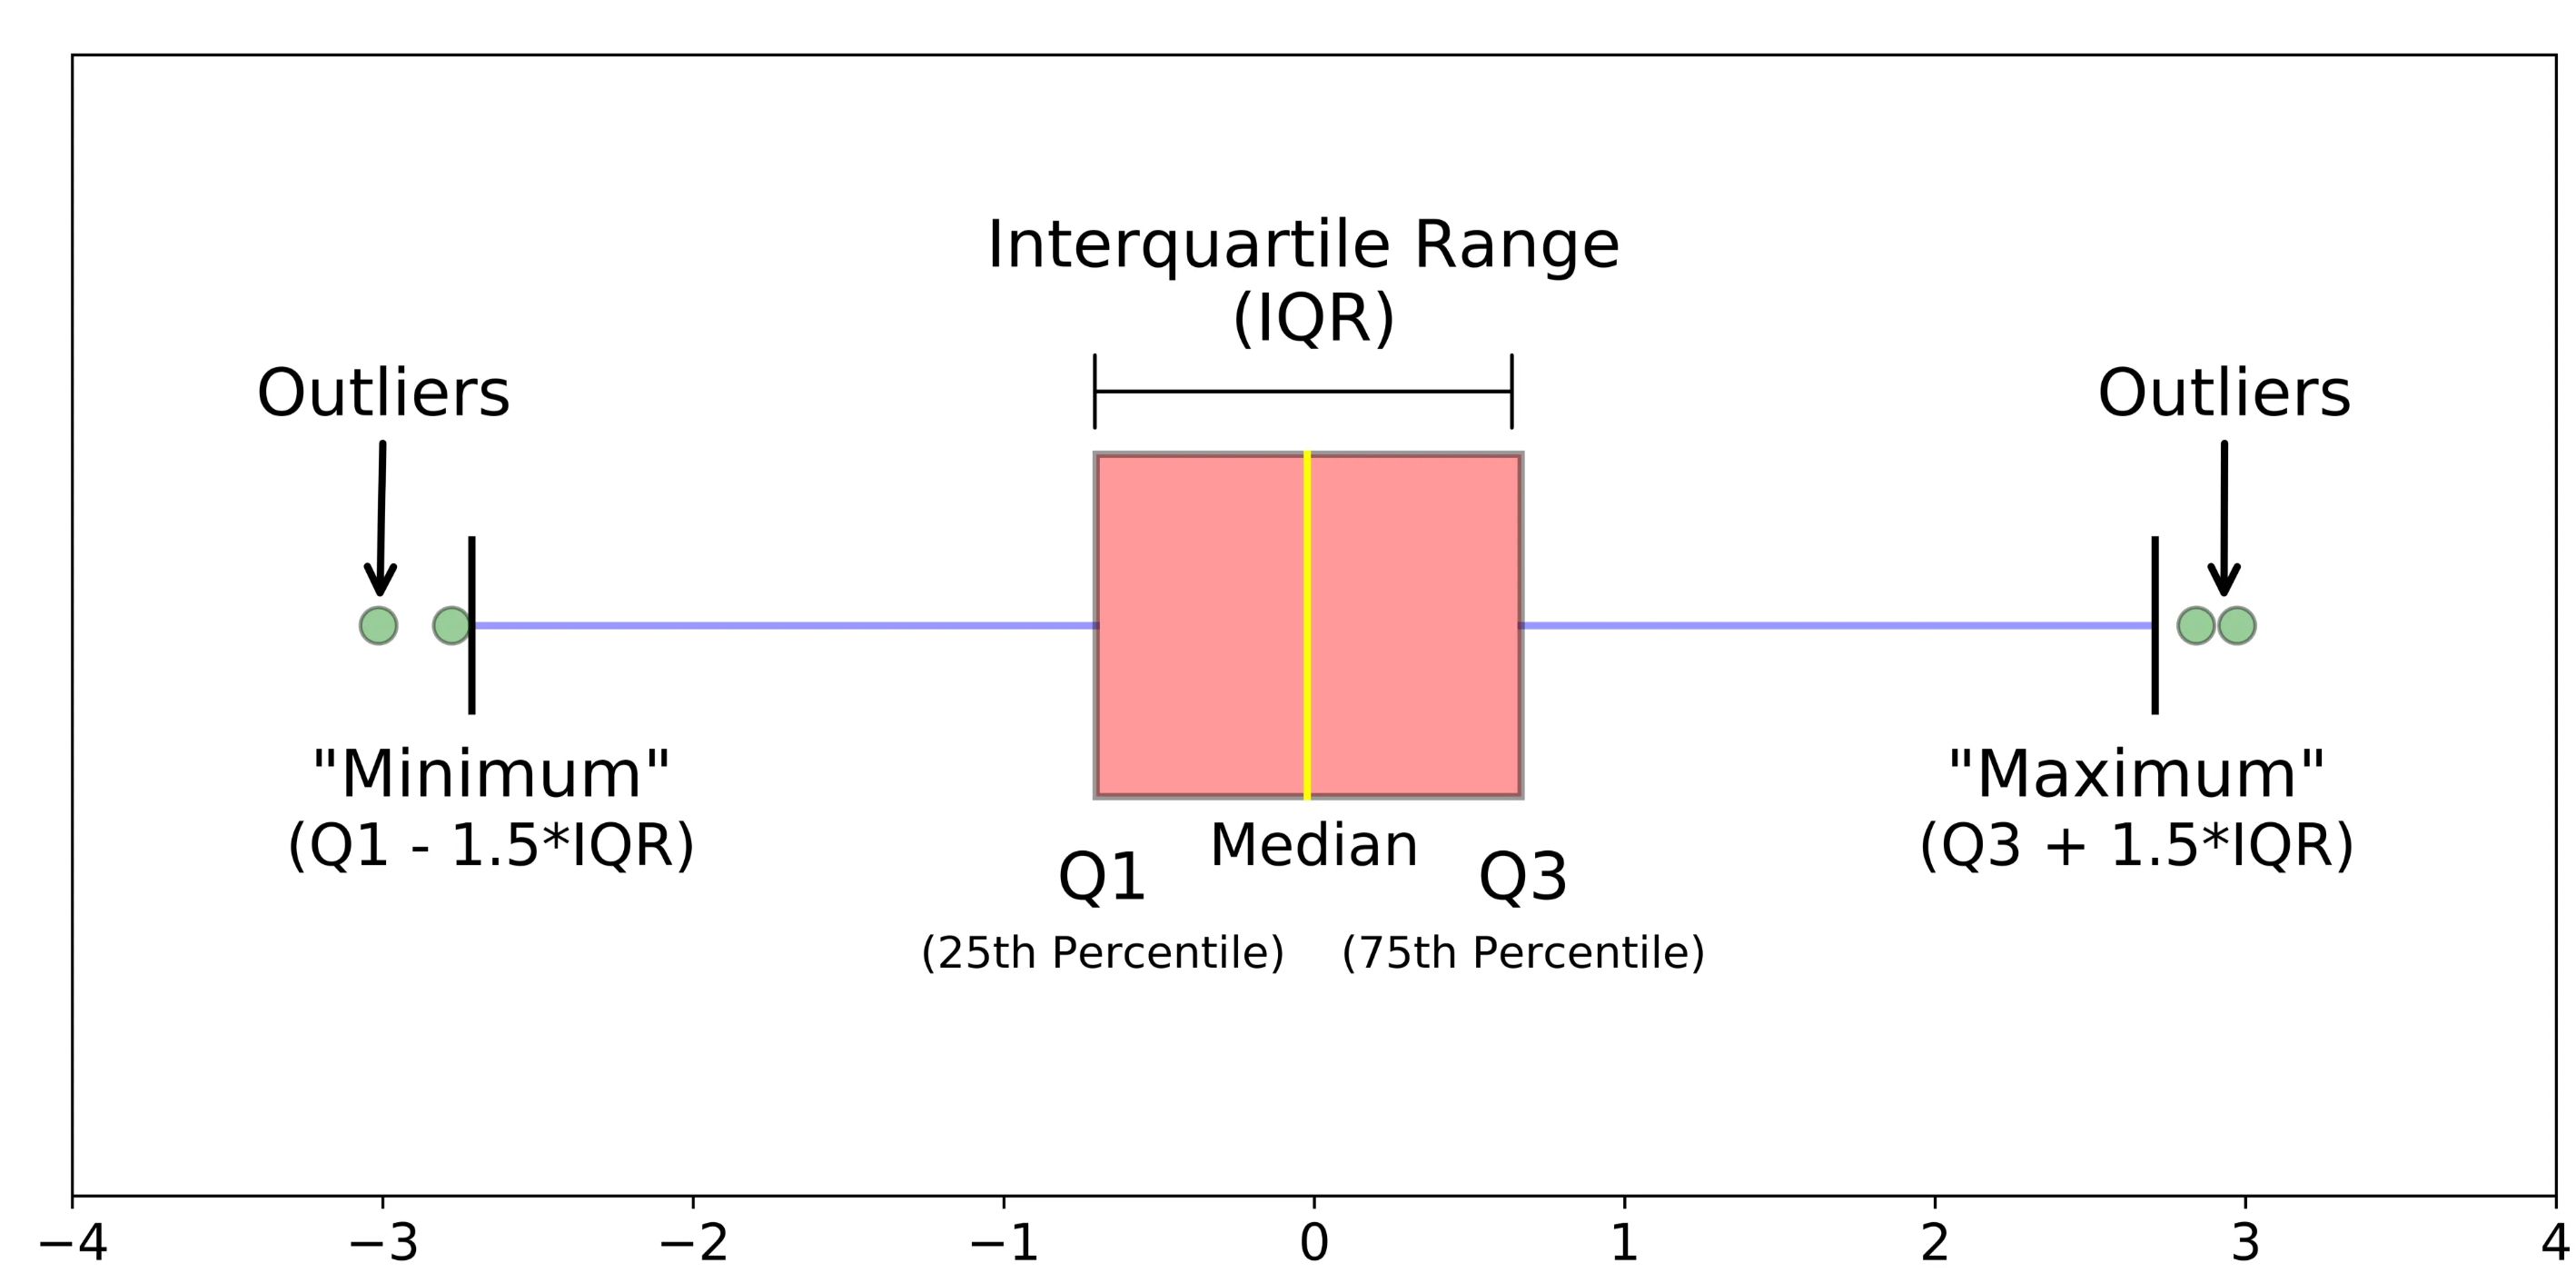

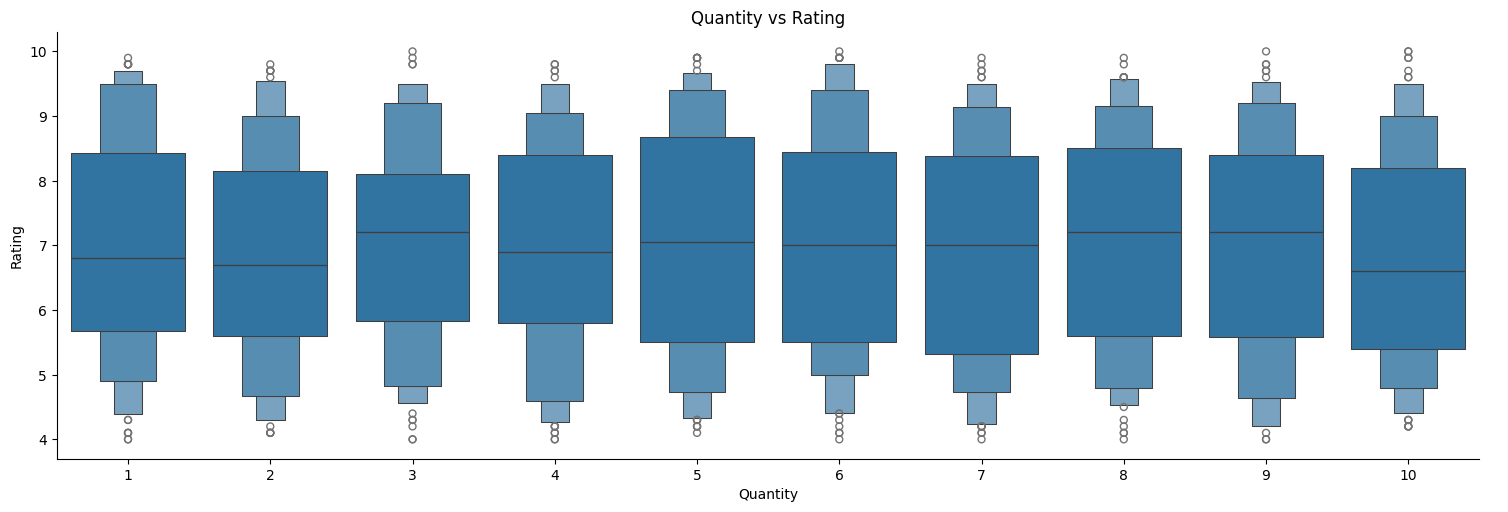

In [115]:
sns.catplot(x='Quantity', y='Rating', data=df, kind='boxen', aspect=3)
plt.xlabel('Quantity')
plt.ylabel('Rating')
plt.title('Quantity vs Rating')
plt.show()